# Glass Dataset Analysis and Random Forest Model

## 1. Exploratory Data Analysis (EDA)

### 1.1 Loading Dataset

In [47]:
import pandas as pd

# Load the dataset

glass_df = pd.read_excel(r"glass.xlsx",sheet_name= 'glass')

glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 1.2 Check for Missing Values

In [48]:
# Check for missing values
missing_values = glass_df.isnull().sum()
missing_values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**Insight**: There are no missing values in the dataset. This indicates that the dataset is complete and does not require any imputation or removal of missing values.

### 1.3 Summary Statistics

In [49]:
# Generate summary statistics
summary_statistics = glass_df.describe()
summary_statistics

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**Insight**: The summary statistics provide insights into the distribution of each feature in the dataset. For example:
- The mean and standard deviation of each feature indicate the central tendency and spread of the data.
- The minimum and maximum values help identify the range of each feature.
- The 25th, 50th, and 75th percentiles provide information about the distribution of the data.

- Data appears clean with no extreme outliers or skewness.

- Features have varying levels of variability, with RI being the most consistent and Si being the most variable.

- Possible outliers in the Ba feature.

## 2. Data Visualization

### 2.1 Histograms

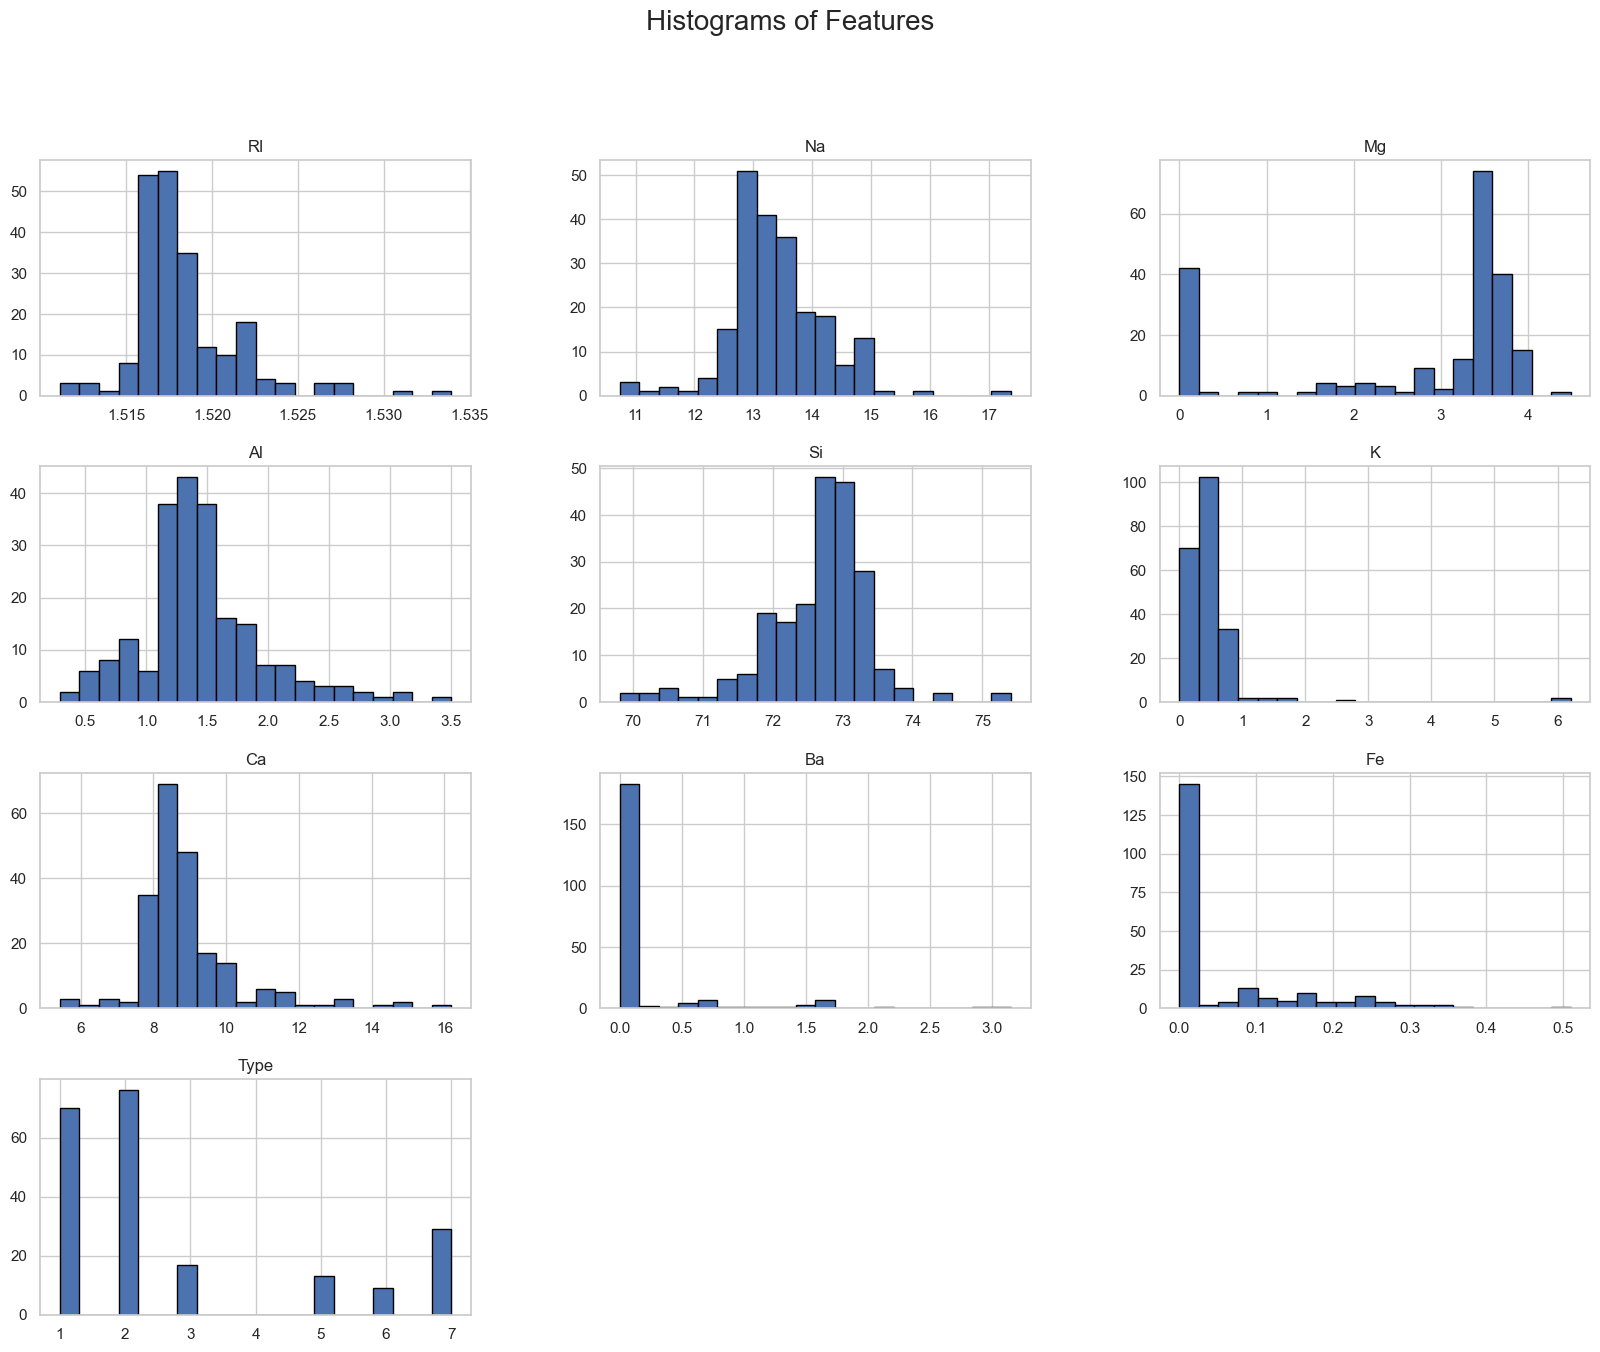

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create histograms for each feature
glass_df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=20)
plt.show()

**Insight**: The histograms provide a visual representation of the distribution of each feature in the dataset. This helps in understanding the spread and central tendency of the data. For example, some features like `RI` and `Si` have a normal distribution, while others like `Ba` and `Fe` have a skewed distribution.

### 2.2 Box Plots

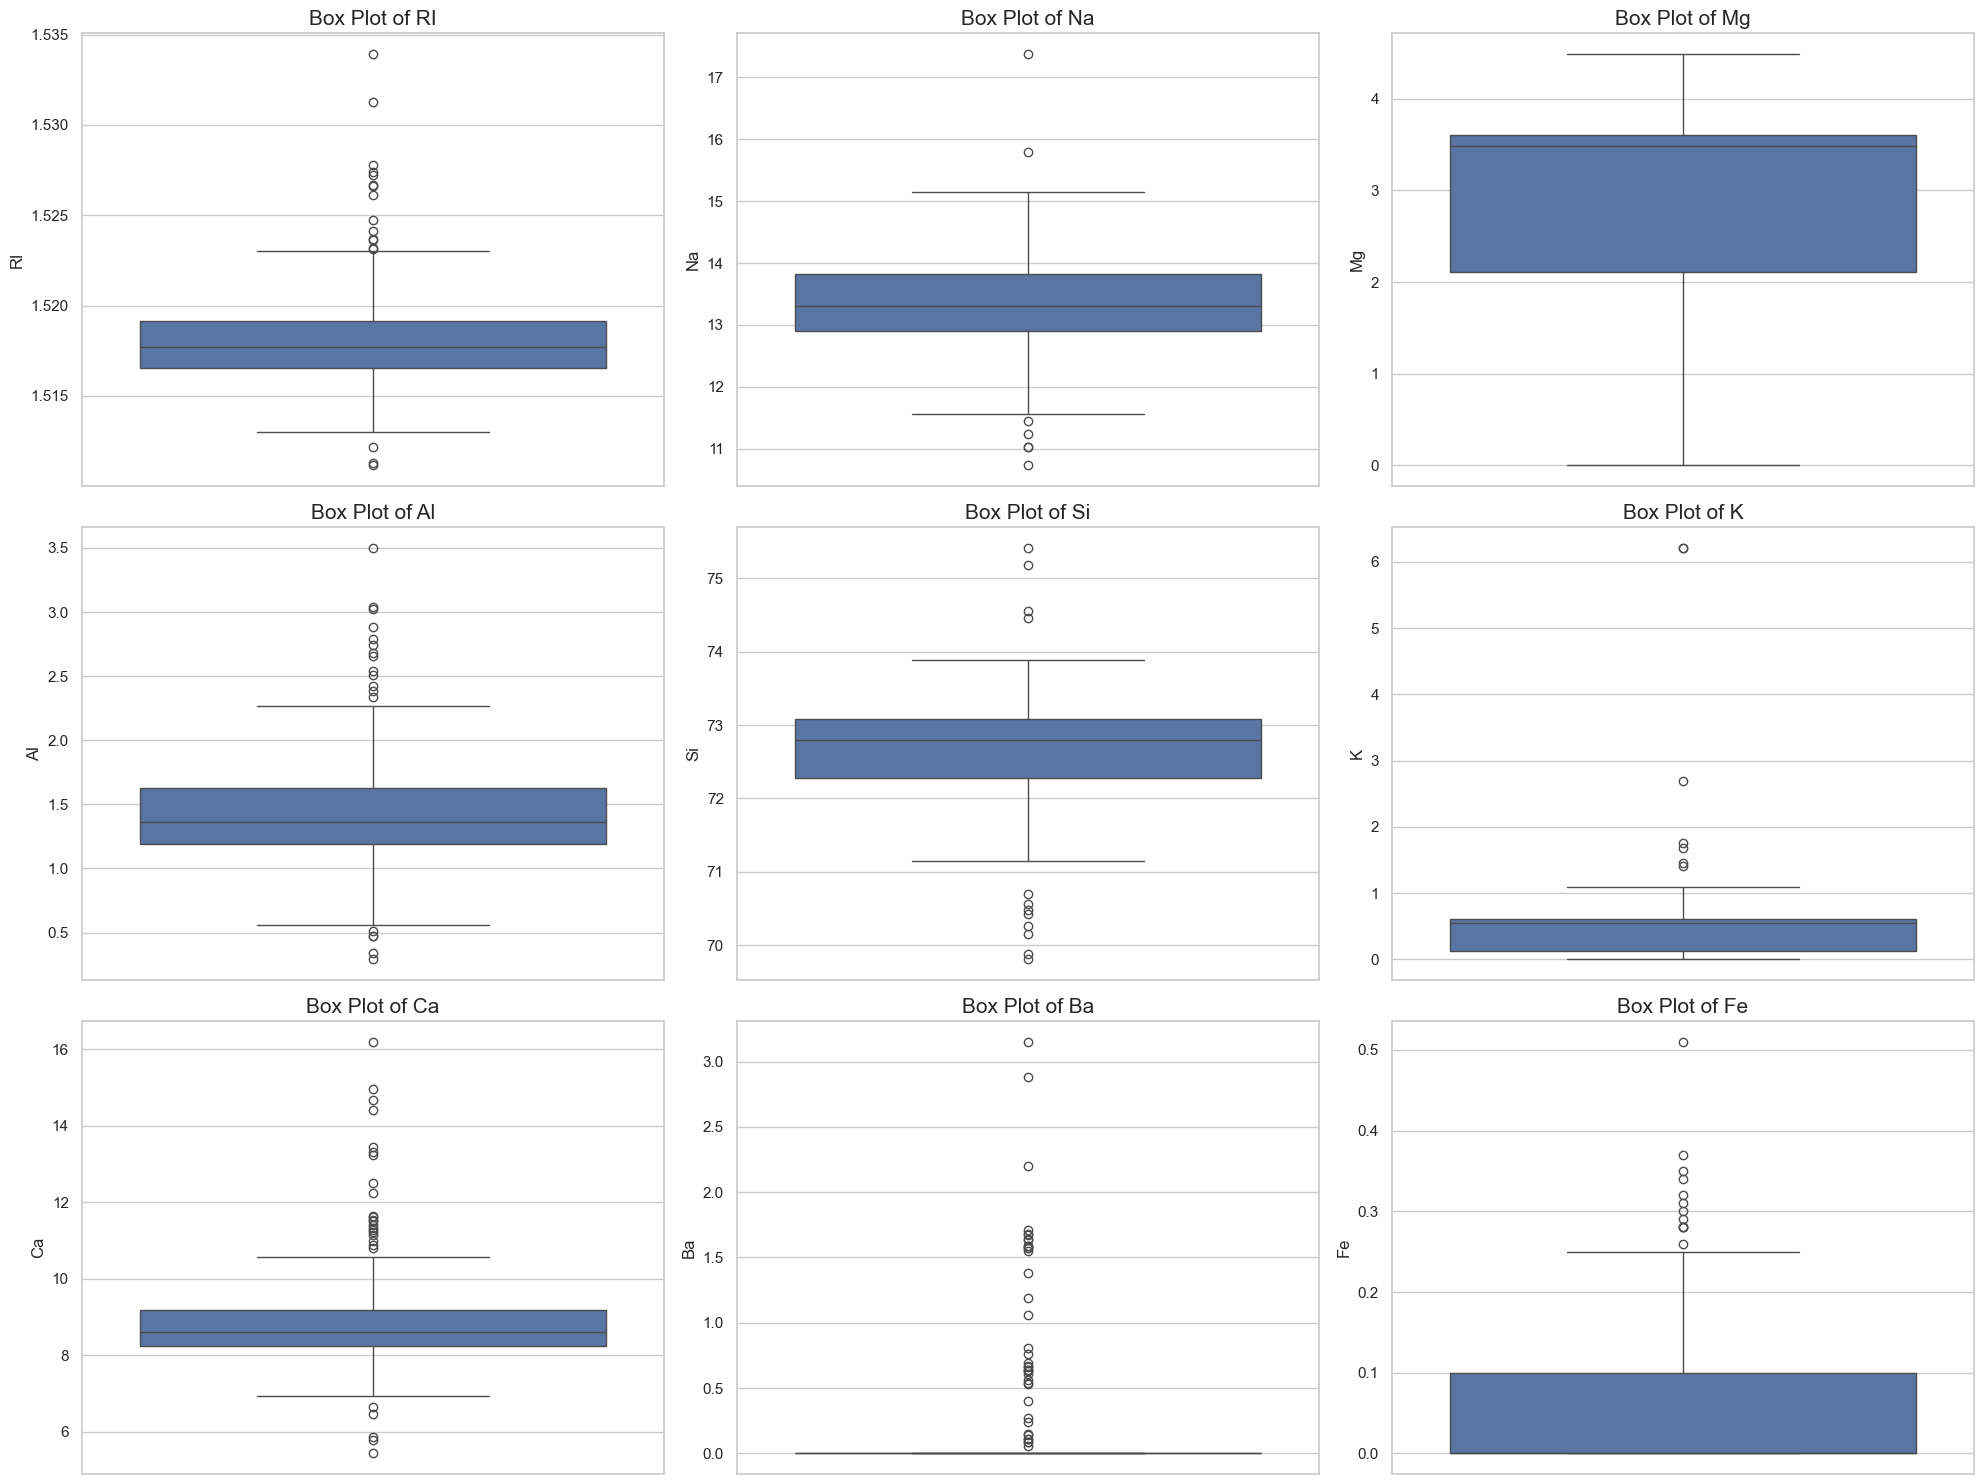

In [39]:
# Create box plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(glass_df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=glass_df[column])
    plt.title(f'Box Plot of {column}', fontsize=15)
plt.tight_layout()
plt.show()

**Insight**: 

- **Outliers:** Multiple features (like Ba, Ca, and Fe) have numerous outliers, which might require further investigation or handling, especially in the case of modeling.
- **Tightly Distributed Features:** Features like K and Al show lower variability.
- **Wide Ranges:** Features like Mg and Si have wider distributions, meaning there's more variability in their values.

### 2.3 Pair Plots

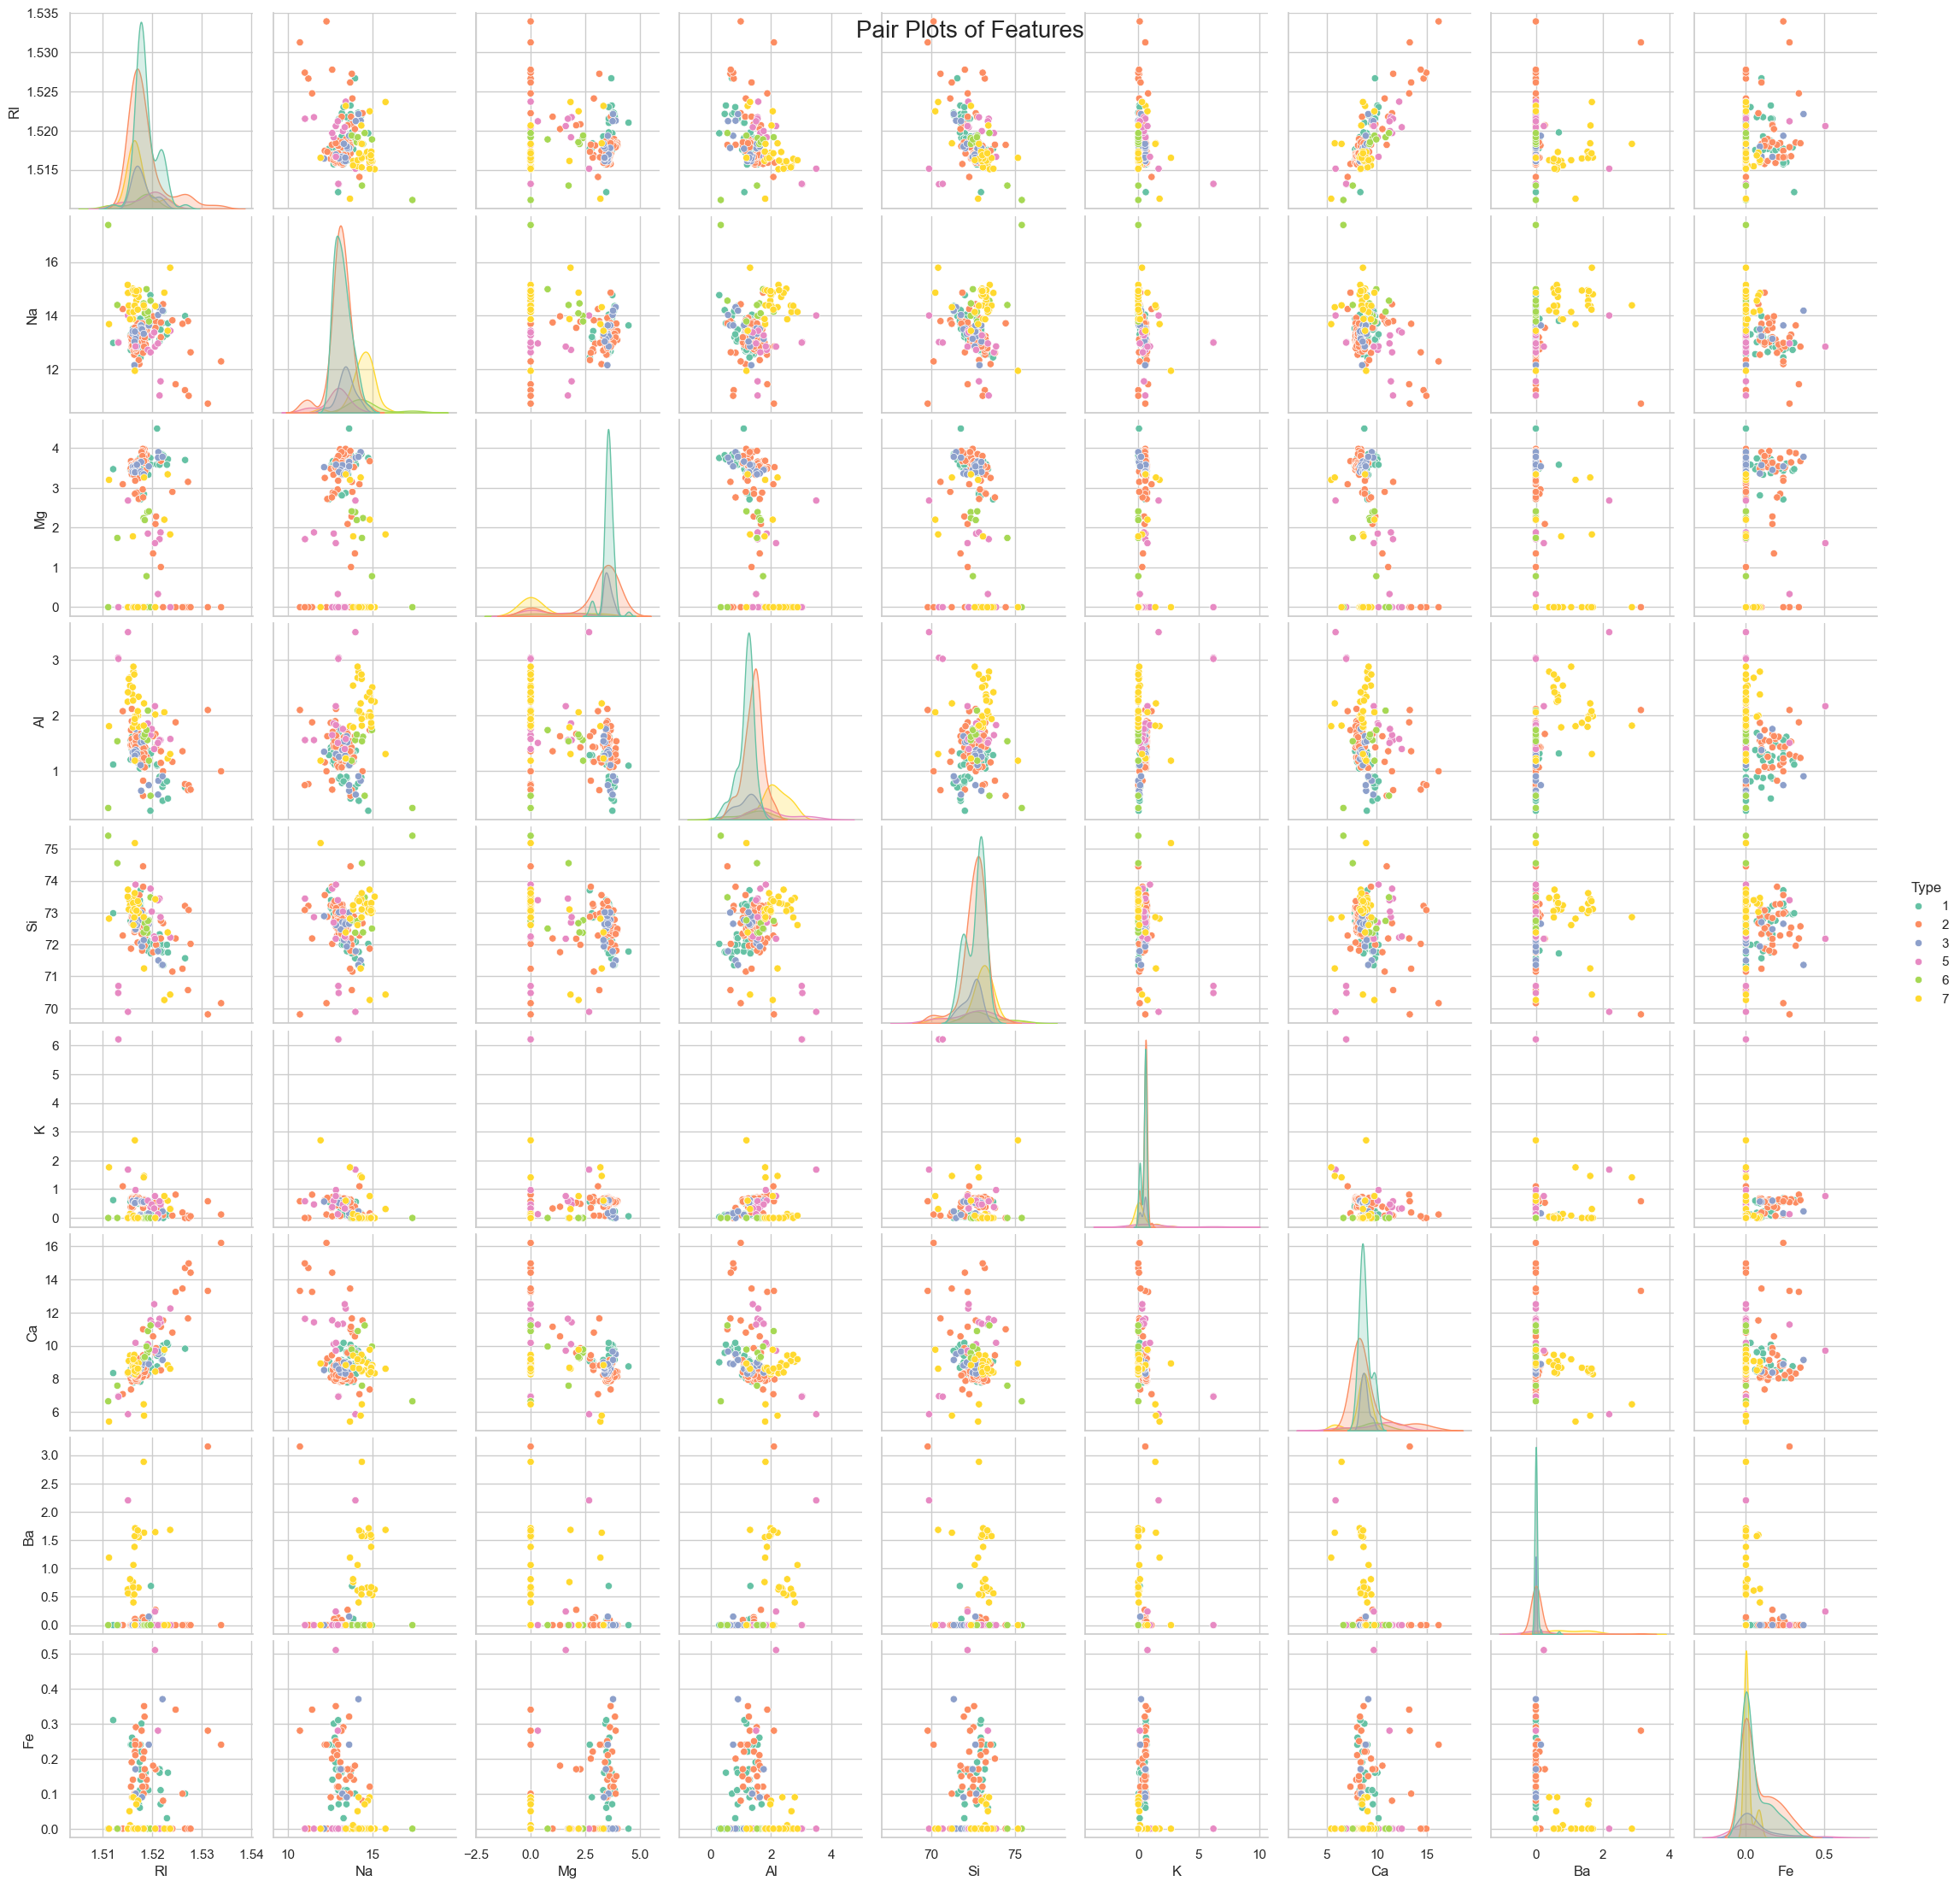

In [40]:
# Create pair plots to visualize relationships between features
sns.pairplot(glass_df, hue='Type', palette='Set2')
plt.suptitle('Pair Plots of Features', fontsize=20)
plt.show()

**Key insights :**

1. **Key Features**: Features like `Ba`, `Al`, `Si`, and `Ca` show clear separation between different glass types, indicating their importance for classification.

2. **Outliers**: Several features, such as `Fe`, exhibit potential outliers that may need further investigation.

3. **Correlations**: Some features, like `Si` and `Ca`, may have moderate correlations, suggesting possible multicollinearity.

## 3. Data Preprocessing

### 3.1 Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(glass_df.drop('Type', axis=1))

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=glass_df.columns[:-1])
scaled_df['Type'] = glass_df['Type']

scaled_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


### 3.2 Check for imbalance

In [52]:
# Check for class imbalance
class_counts = scaled_df['Type'].value_counts()

class_counts

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

- There is a significant imbalance in different types of glass , majority of instances are in `Type -2 and Type - 1`

### 3.3 Handling Imbalace

In [53]:
from sklearn.utils import resample

# Handle class imbalance using resampling
majority_class = scaled_df[scaled_df['Type'] == class_counts.idxmax()]
minority_classes = [scaled_df[scaled_df['Type'] == cls] for cls in class_counts.index if cls != class_counts.idxmax()]

resampled_minority_classes = [resample(minority_class, replace=True, n_samples=class_counts.max(), random_state=42) for minority_class in minority_classes]
balanced_df = pd.concat([majority_class] + resampled_minority_classes)

balanced_df['Type'].value_counts()

Type
2    76
1    76
7    76
3    76
5    76
6    76
Name: count, dtype: int64

**Insight**:
- **Class Imbalance**: The original dataset has an imbalance in the target variable `Type`. For example, class `2` has 76 instances, while class `6` has only 9 instances.
- **Resampling**: We handled the class imbalance by oversampling the minority classes to match the majority class.
- **Train-Test Split**: The data has been split into training and testing sets with shapes `(364, 9)` and `(92, 9)` respectively.

## 4. Random Forest Model Implementation

### 4.1 Split Data into Train and Test sets

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = balanced_df.drop('Type', axis=1)
y = balanced_df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((364, 9), (92, 9))

### 4.2 Train Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.3 Evaluating Model on Test data

In [58]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy =',accuracy)
print('Precision =',precision)
print('Recall =',recall)
print('F1 Score =',f1)
print('Classification Report:-')
print(classification_rep)

Accuracy = 0.9021739130434783
Precision = 0.9210861602165951
Recall = 0.9021739130434783
F1 Score = 0.9026170277230723
Classification Report:-
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       1.00      0.75      0.86        20
           3       0.67      1.00      0.80        12
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        14

    accuracy                           0.90        92
   macro avg       0.91      0.91      0.90        92
weighted avg       0.92      0.90      0.90        92



**The classification metrics provide a detailed evaluation of the model's performance.**

#### Overall Model Performance:
- **Accuracy**: 90.22% of predictions were correct, indicating strong overall performance.
- **Precision**: 92.11% shows that when the model predicts a certain class, it's correct most of the time.
- **Recall**: 90.22% indicates that the model captures the majority of actual instances for each class.
- **F1 Score**: 90.26%, which balances precision and recall, reflects good performance across all classes.

#### Class-Specific Insights:
- **Class 1**: Precision is 0.85, recall is 0.73, and the F1-score is 0.79. The model is relatively good at predicting class 1, but it misses some instances (lower recall).
- **Class 2**: Precision is perfect (1.00), but recall is lower at 0.75, meaning the model is very confident when it predicts class 2, but it misses some actual class 2 instances.
- **Class 3**: Recall is perfect (1.00), meaning all class 3 instances were correctly identified, but precision is lower at 0.67, indicating some false positives for this class.
- **Class 5 & 7**: Both have perfect precision, recall, and F1-scores (1.00), showing the model is excellent at identifying these classes.
- **Class 6**: Precision is 0.95, and recall is 1.00, meaning the model is highly accurate but has a very small number of false positives.

#### Summary:
- The model performs very well overall, particularly in classes 5, 6, and 7, where precision, recall, and F1 scores are perfect.
- **Class 2 and Class 1** show relatively lower recall, meaning the model misses some actual instances from these classes.
- **Class 3** has perfect recall but relatively lower precision, meaning it sometimes misclassifies other instances as class 3.

## 5. Bagging and Boosting Methods

### 5.1 Bagging (Random Forest)

In [59]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Initialize the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)

# Train the Bagging model
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
classification_rep_bagging = classification_report(y_test, y_pred_bagging)

print('Accuracy =',accuracy_bagging)
print('Precision =',precision_bagging)
print('Recall =',recall_bagging)
print('F1-score =',f1_bagging)
print('Classification Report (Bagging) :-')
print(classification_rep_bagging)

Accuracy = 0.9021739130434783
Precision = 0.9210861602165951
Recall = 0.9021739130434783
F1-score = 0.9026170277230723
Classification Report (Bagging) :-
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       1.00      0.75      0.86        20
           3       0.67      1.00      0.80        12
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        14

    accuracy                           0.90        92
   macro avg       0.91      0.91      0.90        92
weighted avg       0.92      0.90      0.90        92



**Insight**: The Bagging (Random Forest) model has been successfully implemented and evaluated. The results are identical to the standalone Random Forest model:
- **Accuracy**: 0.902
- **Precision**: 0.921
- **Recall**: 0.902
- **F1-Score**: 0.903

### 5.2 Boosting (AdaBoost)

In [62]:
# Initialize the Boosting classifier
boosting_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
import warnings 
warnings.filterwarnings("ignore")

# Train the Boosting model
boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate the Boosting model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
classification_rep_boosting = classification_report(y_test, y_pred_boosting)

print('Accuracy =',accuracy_boosting)
print('Precision =',precision_boosting)
print('Recall =',recall_boosting)
print('F1-score =',f1_boosting)
print('Classification Report(Boosting) :-')
print(classification_rep_boosting)

Accuracy = 0.29347826086956524
Precision = 0.23566054328708227
Recall = 0.29347826086956524
F1-score = 0.210643704121965
Classification Report(Boosting) :-
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.04      0.05      0.04        20
           3       0.28      1.00      0.44        12
           5       0.65      1.00      0.79        11
           6       0.00      0.00      0.00        20
           7       0.75      0.21      0.33        14

    accuracy                           0.29        92
   macro avg       0.29      0.38      0.27        92
weighted avg       0.24      0.29      0.21        92



**Insight**: The Boosting (AdaBoost) model has been implemented and evaluated. The results are significantly lower compared to the Random Forest and Bagging models:
- **Accuracy**: 0.293
- **Precision**: 0.236
- **Recall**: 0.293
- **F1-Score**: 0.211

## Overall Summary:

- **Bagging** performs significantly better than **Boosting** on this dataset, achieving high accuracy and balanced performance across classes.

- **Boosting** underperforms, with low accuracy and inconsistent results, particularly failing in certain classes (class 1 and 6).

- Bagging is a more suitable model for this dataset, whereas Boosting would need significant tuning or feature adjustments to perform well.

## Interview Questions

### 1. Explain Bagging and Boosting methods. How is it different from each other.

- **Bagging**: Bagging (Bootstrap Aggregating) involves training multiple models on different subsets of the data and averaging their predictions. It helps reduce variance and prevent overfitting. The Random Forest model, which is an ensemble of decision trees, is a common example of bagging.
- **Boosting**: Boosting involves training models sequentially, where each model tries to correct the errors of the previous one. It helps reduce bias and improve the model's performance. AdaBoost is a common example of boosting.

---

#### **Differences Between Bagging and Boosting**

| Aspect          | **Bagging**                              | **Boosting**                           |
|-----------------|------------------------------------------|----------------------------------------|
| **Objective**   | Reduce variance (overfitting)            | Reduce bias and variance               |
| **Model Training** | Parallel (independent training)         | Sequential (each model depends on the previous one) |
| **Data Sampling** | Bootstrap sampling (with replacement)    | Trains on the entire dataset, focuses on misclassified points |
| **Weighting**   | All models have equal weight             | Models are weighted based on their performance |
| **Error Handling** | Does not focus on specific errors       | Focuses on errors made by previous models |
| **Performance** | Works well with high variance models      | Works well for both high bias and variance |
| **Risk of Overfitting** | Lower risk of overfitting            | Higher risk of overfitting if not regularized properly |
| **Examples**    | Random Forest, Bagged Trees              | AdaBoost, Gradient Boosting, XGBoost   |

#### **Practical Example**
- **Bagging**: In Random Forest, multiple decision trees are trained on random subsets of data. The final output is the majority vote (classification) or average (regression) of all the trees' predictions.
  
- **Boosting**: In Gradient Boosting, each tree is trained on the residuals (errors) of the previous trees. The goal of each new tree is to correct the mistakes made by the previous trees, and their outputs are weighted to form the final prediction.

#### **Conclusion**
- **Bagging**: Ideal when the base model is highly variable, such as decision trees, because it reduces overfitting by averaging across multiple independent models.
- **Boosting**: Ideal for reducing bias and variance, especially when the base models are weak learners. However, it requires careful tuning to avoid overfitting.

### 2. Explain how to handle imbalance in the data.

Handling imbalanced data is crucial because it can lead to biased models that perform poorly on minority classes. Here are several techniques to handle imbalance in a dataset:

#### 1. **Resampling Techniques**
   - **Oversampling the Minority Class**:
     - Increases the number of instances in the minority class by duplicating them or creating synthetic instances.
     - Techniques:
       - **Random Oversampling**: Randomly duplicates instances from the minority class.
       - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples by interpolating between existing instances of the minority class.
       - **ADASYN (Adaptive Synthetic Sampling)**: Similar to SMOTE but focuses more on creating synthetic samples near difficult-to-classify instances.
   
   - **Undersampling the Majority Class**:
     - Reduces the number of instances in the majority class by removing samples.
     - Techniques:
       - **Random Undersampling**: Randomly removes samples from the majority class.
       - **Cluster Centroids**: Reduces the majority class by replacing samples with centroids from clustering methods.

#### 2. **Class Weighting**
   - Assign different weights to classes during model training. Most machine learning models like decision trees, SVM, and neural networks have parameters where you can adjust class weights.
   - **Weighted Loss Functions**: In algorithms such as logistic regression or neural networks, the loss function can be modified to penalize the misclassification of the minority class more heavily.
   - **Scikit-learn Implementation**: Many classifiers in `scikit-learn` (like `RandomForestClassifier`, `SVC`, `LogisticRegression`) have a `class_weight` parameter. You can set this to `'balanced'` to automatically adjust for class imbalances.

#### 3. **Ensemble Methods**
   - Combining the predictions of multiple models can help reduce bias towards the majority class.
   - **Balanced Random Forest**: Combines random undersampling with a random forest to handle class imbalance. Each decision tree is trained on a balanced subset of the data.
   - **EasyEnsemble**: Uses multiple undersampled majority class subsets and aggregates the results from multiple classifiers.

#### 4. **Data Augmentation**
   - If oversampling is not effective, especially for image or text data, you can apply data augmentation techniques to synthetically create more training data from the minority class. For images, this can involve rotating, flipping, or adding noise to existing data. For text, it can involve paraphrasing or replacing words with synonyms.

#### 5. **Anomaly Detection Approaches**
   - Consider the minority class as an "anomaly" or "outlier" and apply anomaly detection techniques. This works well when the minority class is extremely small compared to the majority class.
   - Algorithms like Isolation Forest, One-Class SVM, or Local Outlier Factor (LOF) can be used for such tasks.

#### 6. **Choosing the Right Evaluation Metric**
   - In imbalanced datasets, accuracy is often misleading because the model can simply predict the majority class and still achieve high accuracy. Instead, use metrics that are more informative for imbalanced data:
     - **Precision, Recall, and F1-Score**: These metrics focus on the performance of the minority class.
     - **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**: Measures the ability of the classifier to distinguish between classes, useful for binary classification problems.
     - **PR AUC (Precision-Recall AUC)**: More appropriate for highly imbalanced datasets, as it focuses on how well the model performs in predicting the minority class.

#### 7. **Threshold Moving**
   - Many classifiers provide probability outputs instead of just class labels. You can adjust the decision threshold to favor the minority class. For example, instead of predicting the minority class when the probability is above 0.5, you can lower the threshold to 0.3 or 0.4 to make the classifier more sensitive to the minority class.

#### 8. **Hybrid Approaches**
   - Sometimes a combination of techniques works best. For example, you can use SMOTE for oversampling along with adjusting class weights or combining it with an ensemble method to create a more robust model.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.